In [1]:
import numpy as np
import math
from matplotlib import pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import bernoulli

In [94]:
def best_response(A,B,C, q):
    return (A - C - np.mean(q))/(2*B)

def fixed_point(A,B,C):
    return (A - C)/((2*B + 1))

def simulator(A,B,C,e,sigma,bin_count,T, n):  
    
    # A,B,C - parameters of Cournot model
    # e - error rate epsilon
    # sigma - standard deviation of error distributions
    # bin_count - number of bins for plotting frequency distribution
    # n - number of samples
    
    # set initial states randomly
    quantities_produced_1 = []
    quantities_produced_2 = []
    for i in range(T):
        quantities_produced_1.append(np.random.uniform(0, (A-C)/B))
        quantities_produced_2.append(np.random.uniform(0, (A-C)/B))
    
    for i in range(n):
        # best respond to average of last T periods
        br_1 = best_response(A,B,C,quantities_produced_2[-T:])
        br_2 = best_response(A,B,C,quantities_produced_1[-T:])
        
        # select best response for firm 1 w.p. 1-e, otherwise sample from 
        # normal distribution on [0,R] centered at best response
        r_1 = bernoulli.rvs(1-e, size=1)[0]
        if r_1 == 1:
            q_1 = br_1
        else:
            q_1 = np.random.normal(br_1, sigma)

        # select best response for firm 1 w.p. 1-e, otherwise sample from 
        # normal distribution on [0,R] centered at best response
        r_2 = bernoulli.rvs(1-e, size=1)[0]
        if r_2 == 1:
            q_2 = br_2
        else:
            q_2 = np.random.normal(br_2, sigma)

        quantities_produced_1.append(q_1)
        quantities_produced_2.append(q_2)
    
    #plotting stuff
    max_val = (A - C)/B
    i = 1
    count = 0
    starting_point = fixed_point(A,B,C) + ((A - C)/B)/(bin_count*2)

    # create nice bins for histogram
    bins_list = [starting_point]
    while count < max_val:
        bins_list.append(starting_point + i*((A - C)/B)/bin_count)
        count = bins_list[-1]
        i +=1 

    i = 1
    while count > 0:
        bins_list.append(starting_point - i*((A - C)/B)/bin_count)
        count = bins_list[-1]
        i +=1 

    bins_list = sorted(bins_list)
    bins_list = [bin for bin in bins_list]
    bins_list[0] = 0
    
    plt.figure(figsize=(8, 6))
    data = plt.hist(quantities_produced_1[15000:], bins=bins_list, density=True)
    
    plt.title('\u03B5 = ' + str(e) + ', \u03C3 = ' + str(sigma) +', T = ' + str(T), fontsize=20)
    plt.xlabel('Quantities Produced by Firm i', fontsize=18)
    plt.ylabel('Density', fontsize=18)
    plt.xticks(fontsize=16 )
    plt.yticks(fontsize=16 )
    
    plt.show()
    return data, quantities_produced_1

In [95]:
# calculate mass in a ball of a given size about the equilibrium
def stationary(quantities, size,A,B,C):
    close_points = [i for i in quantities if i > fixed_point(A,B,C) - size and i < fixed_point(A,B,C) + size]
    return len(close_points)/len(quantities)

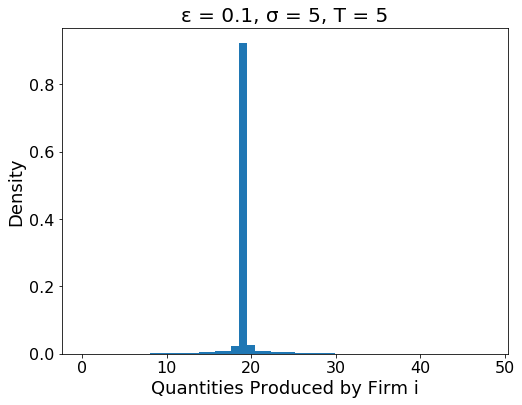

0.9150642467876606


In [96]:
A = 100
B = 2
C = 5
e = 0.10
data, quantities=simulator(A,B,C,e,5,50, 5, 100000)
print(str(stationary(quantities,1,A,B,C)))

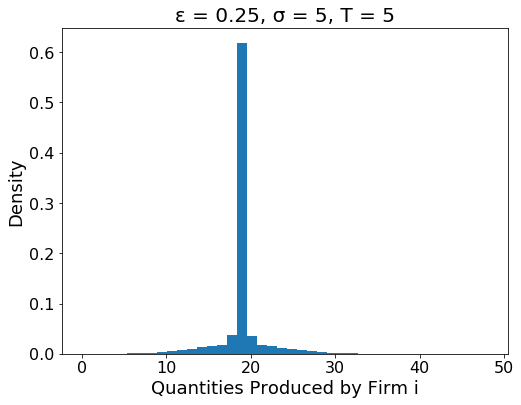

0.7868706564671767


In [97]:
A = 100
B = 2
C = 5
e = 0.25
data, quantities=simulator(A,B,C,e,5,40,5, 100000)
print(str(stationary(quantities,1,A,B,C)))

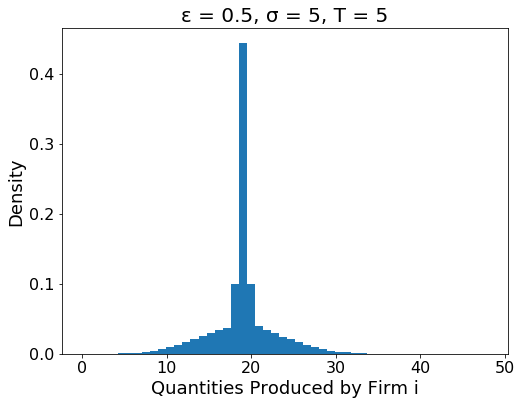

0.568331583420829


In [98]:
A = 100
B = 2
C = 5
e = 0.50
data, quantities=simulator(A,B,C,e,5,50, 5,100000)
print(str(stationary(quantities,1,A,B,C)))